<a href="https://colab.research.google.com/github/Bichitrananda/Performance-evaluation-of-Machine-learning-algorithms-in-Biomedical-Document-Classification/blob/master/Farm_Ads1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
ls

 20_cnn_model.json             'Getting started.pdf'
 20n_cnn_model1.json            glove.6B.50d.txt
 20n_cnn_model.json             IMDB_weights.best.hdf5
 20news_weights.best1.hdf5      MISSION/
 20news_weights.best.hdf5       model.json
 BC3_part1.csv                  model.yaml
 BC3_part2.csv                  odia-dataset/
 BENGALI/                       project_1_reuter.ipynb
 bp_mll_keras.py                __pycache__/
 bp_mll.py                      RCNN_BC3-P2.ipynb
 cnn_frs_farm_model.json        Reuter_cnn_model.json
'Colab Notebooks'/              Reuter_weights.best.hdf5
'Copy of farm-ads_tr.csv'       RMDL/
'Copy of FRS_TREC.ipynb'       'ROUGH SET'/
 data1.csv                      SVM-CNN/
 data3.csv                      test.csv
 data4.csv                      test_labels.csv
 data.csv                       TEXT_CODE/
 data_WOS5736.csv               text_feature_extraction.py
'DEEP LEARING'/                 train.csv
 diabetes.csv                   trec.csv
 diabetes.ip

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_files
import sys
from time import time
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
import pandas as pd
#Data description
df2=pd.read_csv('farm-ads_tr.csv')
df2.head()


,Label,Abstract
0,1,ad-jerry ad-bruckheimer ad-chase ad-premier ad...
1,0,ad-rheumatoid ad-arthritis ad-expert ad-tip ad...
2,0,ad-rheumatologist ad-anju ad-varghese ad-yonke...
3,0,ad-siemen ad-water ad-remediation ad-water ad-...
4,0,ad-symptom ad-muscle ad-weakness ad-genetic ad...


In [0]:
df2.groupby('Label').size()

Label
0    1932
1    2210
dtype: int64

In [0]:
#sentences=df2['Abstract']
#labels=df2['Label']
#split the data into train and test dataset
#print(len(sentences))
train_data=df2['Abstract']
Y=df2['Label']
print(len(train_data))
bbc_vec = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize, encoding='latin-1')
bbc_counts = bbc_vec.fit_transform(train_data.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(bbc_counts)
print(X.shape)

4142
(4142, 26486)


In [0]:
#from sklearn.model_selection import StratifiedKFold
#kfold = StratifiedKFold(n_splits=10, random_state=7)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.878806 (0.016527)
DT: 0.864563 (0.011182)
MNB: 0.906571 (0.009062)
BNB: 0.861190 (0.018957)
RF: 0.901499 (0.009626)
SVM: 0.912364 (0.008410)
PPN: 0.900049 (0.007944)
SGD: 0.905601 (0.011557)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Ridge: 0.914055 (0.006963)
RC: 0.868661 (0.014470)
PA: 0.903914 (0.008992)
BPN: 0.901255 (0.009747)


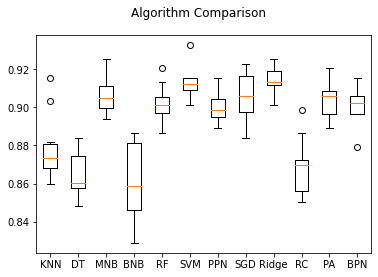

In [0]:
#Comparision of Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn import svm
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', tree.DecisionTreeClassifier()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('MNB', MultinomialNB(alpha=.01)))
models.append(('BNB', BernoulliNB(alpha=.01)))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVM', svm.SVC()))
models.append(('PPN', Perceptron(max_iter=50, tol=1e-3)))
models.append(('SGD', SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")))
models.append(('Ridge', RidgeClassifier(tol=1e-2, solver="sag")))
models.append(('RC', NearestCentroid()))
models.append(('PA', PassiveAggressiveClassifier(max_iter=50, tol=1e-3)))
models.append(('BPN', MLPClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = StratifiedKFold(n_splits=10)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [0]:
#.......Evaluationg Accuracy, precision, recall, f1-score for all algo....#

In [0]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10) # Define the split - into 2 folds 
skf.get_n_splits(X,Y)
print(skf)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [0]:
#.................SVM................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = svm.SVC()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  #score1=precision_score(y_test, y_pred, average='weighted')
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  #score2=recall_score(y_test, y_pred, average='weighted')
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  #score3=f1_score(y_test, y_pred, average='weighted')  
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)
  a = np.array(acc)

print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9123636575286653 0.008410419089658342
Precision: 0.9149323459808307 0.007999532115239212
Recall: 0.9123636575286653 0.008410419089658342
F1-score: 0.9119497153862752 0.008507787465045737


In [0]:
#.................KNN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import svm
model = KNeighborsClassifier(n_neighbors=10)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8788056574122578 0.016527056996588015
Precision: 0.8796725763954065 0.01677690571096911
Recall: 0.8788056574122578 0.016527056996588015
F1-score: 0.8785067739489956 0.01653569175556832


In [0]:
#.................DT................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn import tree
model = tree.DecisionTreeClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8684250043652872 0.007659899736728784
Precision: 0.8691787914962305 0.007719331673536846
Recall: 0.8684250043652872 0.007659899736728784
F1-score: 0.86825460106503 0.007714486186378308


In [0]:
#.................RF................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9043967173039986 0.01028214505729393
Precision: 0.9074437602160002 0.01064744395552877
Recall: 0.9043967173039986 0.01028214505729393
F1-score: 0.9038967154956463 0.010312715927616636


In [0]:
#.................MNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MultinomialNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9065706303474768 0.009061737589956336
Precision: 0.9089971449228417 0.00869039252438242
Recall: 0.9065706303474768 0.009061737589956336
F1-score: 0.9061430758628927 0.009162184721618073


In [0]:
#.................BNB................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = BernoulliNB(alpha=.01)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.8611896862813573 0.018956634605172454
Precision: 0.8642576039391627 0.01685156646790722
Recall: 0.8611896862813573 0.018956634605172454
F1-score: 0.8612514739284901 0.018971786587609896


In [0]:
#.................PPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = Perceptron(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9000488912170421 0.00794438151662253
Precision: 0.9010185001273483 0.007735867521662739
Recall: 0.9000488912170421 0.00794438151662253
F1-score: 0.8998345021536872 0.00799870884698947


In [0]:
#.................SGD................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model =SGDClassifier(alpha=.0001, max_iter=50,penalty="l1")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9048774809382456 0.010309622210920393
Precision: 0.9052794016053433 0.010319231939997389
Recall: 0.9048774809382456 0.010309622210920393
F1-score: 0.9047372942118818 0.010332184245919035


In [0]:
#.................Ridge................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = RidgeClassifier(tol=1e-2, solver="sag")
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:558: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).


Accuracy: 0.9142966067167219 0.007372491922939072
Precision: 0.9154357901277648 0.007502443009937843
Recall: 0.9142966067167219 0.007372491922939072
F1-score: 0.9140700583459995 0.007371494517400878


In [0]:
#.................RC................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = NearestCentroid()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.868661311914324 0.01447035871258589
Precision: 0.8735368068144703 0.013883376340985928
Recall: 0.868661311914324 0.01447035871258589
F1-score: 0.8675685155387871 0.01477021060050877


In [0]:
#.................PA................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = PassiveAggressiveClassifier(max_iter=50, tol=1e-3)
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9053629008788778 0.006129569201811188
Precision: 0.9059171651981458 0.006195722582675178
Recall: 0.9053629008788778 0.006129569201811188
F1-score: 0.9052247769813508 0.006105318296258122


In [0]:
#.................BPN................
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
acc=list();
prec=list();
recall=list();
f1=list();
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
model = MLPClassifier()
for train_index, test_index in skf.split(X,Y):
  #print('TRAIN', train_index, “TEST:”, test_index);
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  #y_pred=FRS(X_train,y_train,X_test,0.15)
  score=accuracy_score(y_test, y_pred)
  acc.append(score)
  score1=precision_score(y_test, y_pred, average='weighted')
  prec.append(score1)
  score2=recall_score(y_test, y_pred, average='weighted')
  recall.append(score2)
  score3=f1_score(y_test, y_pred, average='weighted')  
  f1.append(score3)

a = np.array(acc)
print("Accuracy:",a.mean(), a.std())
b = np.array(prec)
print("Precision:",b.mean(), b.std())
c = np.array(recall)
print("Recall:",c.mean(), c.std())
d = np.array(f1)
print("F1-score:",d.mean(), d.std())

Accuracy: 0.9017379663581864 0.009170258667210756
Precision: 0.9023797268965676 0.009236894624889507
Recall: 0.9017379663581864 0.009170258667210756
F1-score: 0.90160953499949 0.009178766221112323


In [0]:
#.......................END..........................